# Restaurant Data Cleaning & EDA

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the restaurant data from Yelp
df = pd.read_csv('../data/restaurants.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(3729, 8)

In [6]:
# Getting rid of restaurants out of the state of CT since we are only using CT
df = df.loc[df['state'] == 'CT']

In [7]:
# Mapping price categories to numeric values
price_map = {
    '$': 1,
    '$$': 2,
    '$$$': 3,
    '$$$$': 4,
}

df['price'] = df['price'].map(price_map)

In [8]:
df['price'].value_counts()

2    2427
1     804
3     236
4      23
Name: price, dtype: int64

#### Note: we are going to try two different sets of features for modeling affluence of a city:
1. Average price of all restaurants and total restaurants
2. Percentage of restaurants that fall into each price bucket and total restaurants

## Average Price

In [9]:
# Grouping by city to get the average restaurant price per city
df_1 = df.groupby('city').mean()['price']

In [10]:
# It returned a series, so we put it back into a data frame
df_1 = pd.DataFrame(df_1)

In [11]:
# Adding the total number of restaurants
df_1['num_restaurants'] = df.groupby('city').count()['id']

In [12]:
# Taking a look at the data frame
df_1.head()

,price,num_restaurants
city,,
Amston,1.0,1
Andover,1.0,3
Ansonia,2.0,12
Ashford,1.5,4
Avon,2.1,30


In [14]:
# Resetting the index so that city is not the index
df_1 = df_1.reset_index()

### Export

In [15]:
# Saving the data
df_1.to_csv('../data/avg_price_restaurants.csv', index=False)

## Percentage of Price Categories

In [13]:
# Creating a pivot table with the count of each price category per city
pivot = pd.pivot_table(df, index='city', columns='price', values='id', aggfunc="count", fill_value=0)

In [14]:
df_2 = pd.DataFrame(pivot.to_records())

In [15]:
# Adding in the total number of restaurants
df_2['total_restaurants'] = df.groupby('city').count()['id'].values

In [16]:
# Normalizing features
df_2['1'] = df_2['1']/df_2['total_restaurants']
df_2['2'] = df_2['2']/df_2['total_restaurants']
df_2['3'] = df_2['3']/df_2['total_restaurants']
df_2['4'] = df_2['4']/df_2['total_restaurants']

In [17]:
df_2.head()

,city,1,2,3,4,total_restaurants
0,Amston,1.000000,0.000000,0.000000,0.0,1
1,Andover,1.000000,0.000000,0.000000,0.0,3
2,Ansonia,0.000000,1.000000,0.000000,0.0,12
3,Ashford,0.500000,0.500000,0.000000,0.0,4
4,Avon,0.033333,0.833333,0.133333,0.0,30


### Export

In [18]:
# Saving the data
df_2.to_csv('../data/perc_price_category.csv', index=False)

### Visualizations

In [19]:
# Creating a boxplot function to check distribution of features
def boxplot(column):
    fig, ax = plt.subplots(figsize=(13,4))
    sns.boxplot(df_2[column], ax=ax)
    ax.set_title(f"Distribution of Price {column}")
    ax.set_xlabel('Percent of Total Restaurants')
    ax.tick_params(labelsize=10);

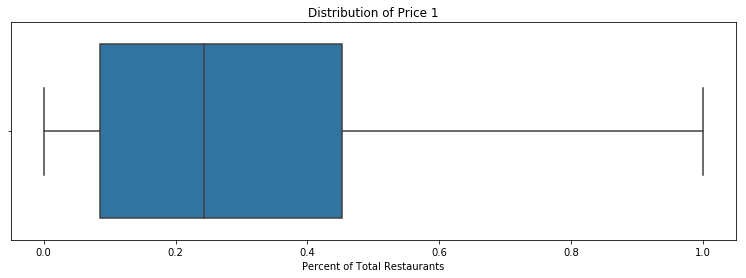

In [20]:
boxplot('1')

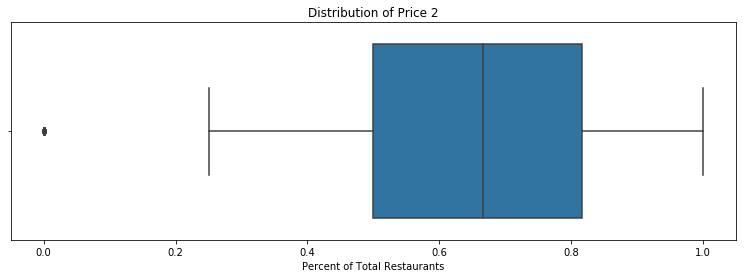

In [21]:
boxplot('2')

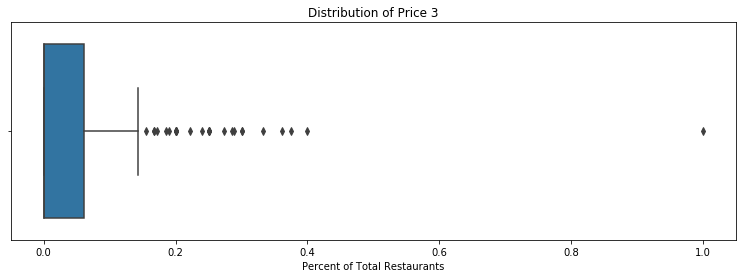

In [22]:
boxplot('3')

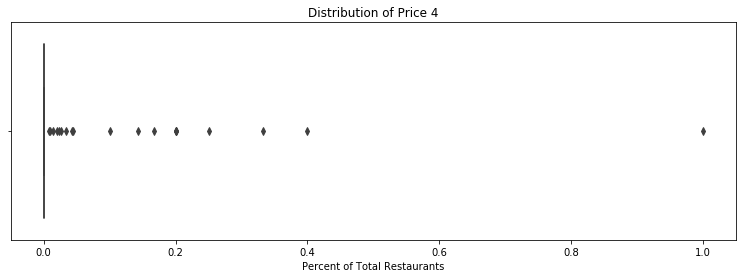

In [23]:
boxplot('4')

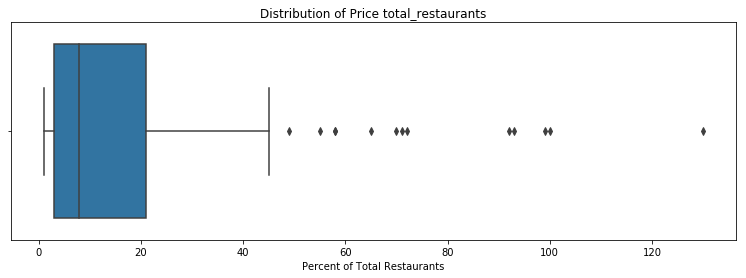

In [24]:
boxplot('total_restaurants')